# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#New in here:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

#New in here:
from sklearn.utils import resample

#New in here:
from imblearn.over_sampling import SMOTE

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud'>

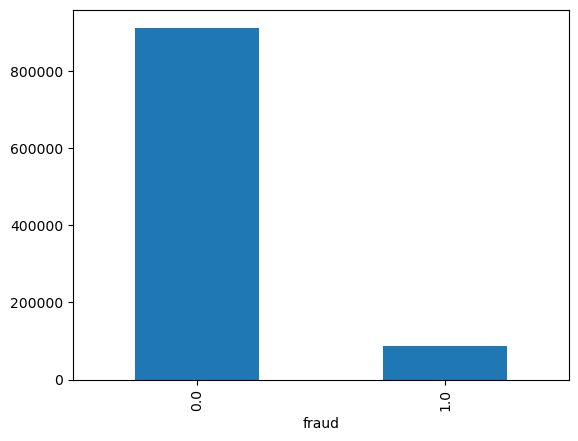

In [7]:
fraud_count = fraud['fraud'].value_counts()
fraud_count.plot(kind = "bar")

In [ ]:
#Yes the data is imblanced

In [8]:
features = fraud.drop(columns=['fraud'])
target = fraud['fraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_test_scaled= scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
log_reg.score(X_test_scaled, y_test)

0.958468

In [15]:
pred = log_reg.predict(X_test_scaled)

In [16]:
print(classification_report(y_pred = pred, y_true= y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228088
         1.0       0.89      0.60      0.72     21912

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000



In [24]:
#Oversampling: 
train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [25]:
train['fraud'] = y_train.values

In [33]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.382833,-0.183956,-0.366595,-2.730017,-0.733905,-0.334268,0.733333,0.0
1,-0.323154,-0.182726,-0.040675,0.366298,-0.733905,-0.334268,0.733333,0.0
2,-0.292196,-0.180798,-0.492597,0.366298,1.362575,-0.334268,0.733333,0.0
3,-0.181892,0.014054,-0.022412,0.366298,-0.733905,2.991608,0.733333,0.0
4,-0.085188,-0.168661,0.124326,0.366298,1.362575,-0.334268,-1.363637,0.0
...,...,...,...,...,...,...,...,...
749995,-0.149636,-0.029862,-0.475247,0.366298,-0.733905,-0.334268,-1.363637,0.0
749996,-0.382053,0.012238,1.604155,-2.730017,-0.733905,-0.334268,-1.363637,1.0
749997,0.059485,-0.179681,0.078942,0.366298,-0.733905,2.991608,0.733333,0.0
749998,-0.395078,-0.179712,-0.420269,-2.730017,-0.733905,-0.334268,-1.363637,0.0


In [34]:
fraud = train[train['fraud'] == 1]
no_fraud = train[train['fraud'] == 0]

In [35]:
fraud_oversampled = resample(fraud,
                                    replace = True,
                                    n_samples= len(no_fraud),
                                    random_state=0)

In [38]:
train_over = pd.concat([fraud_oversampled, no_fraud])

In [39]:
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31272,1.294775,-0.013123,-0.575487,0.366298,-0.733905,-0.334268,0.733333,1.0
499467,-0.356093,-0.058284,3.086846,0.366298,-0.733905,-0.334268,0.733333,1.0
488221,2.247432,-0.161067,-0.449697,0.366298,-0.733905,-0.334268,0.733333,1.0
601946,-0.322970,-0.131898,0.930947,0.366298,1.362575,-0.334268,0.733333,1.0
526302,0.140536,-0.177436,1.079692,0.366298,1.362575,-0.334268,0.733333,1.0
...,...,...,...,...,...,...,...,...
749994,0.012534,-0.101666,-0.582830,0.366298,1.362575,-0.334268,0.733333,0.0
749995,-0.149636,-0.029862,-0.475247,0.366298,-0.733905,-0.334268,-1.363637,0.0
749997,0.059485,-0.179681,0.078942,0.366298,-0.733905,2.991608,0.733333,0.0
749998,-0.395078,-0.179712,-0.420269,-2.730017,-0.733905,-0.334268,-1.363637,0.0


<Axes: xlabel='fraud'>

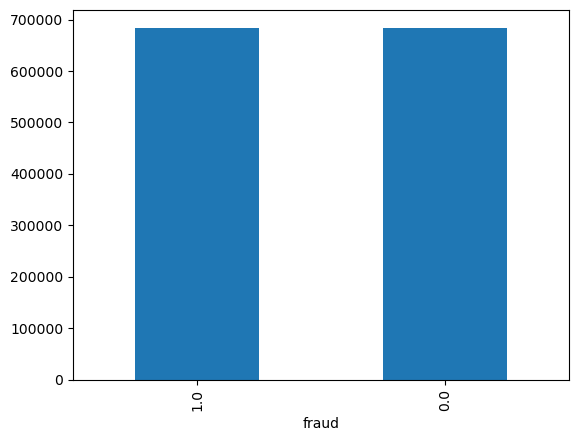

In [40]:
fraud_count = train_over['fraud'].value_counts()
fraud_count.plot(kind = "bar")

In [41]:
X_train_over = train_over.drop(columns=["fraud"])

In [42]:
y_train_over = train_over['fraud']

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [45]:
log_reg.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.934464

In [44]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228088
         1.0       0.58      0.95      0.72     21912

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [46]:
#undersample:
no_fraud_undersampled = resample(no_fraud,
                                    replace = True,
                                    n_samples= len(fraud),
                                    random_state=0)

In [47]:
train_under = pd.concat([no_fraud_undersampled, fraud])

In [48]:
X_train_under = train_under.drop(columns=["fraud"])
y_train_under = train_under['fraud']

In [49]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [50]:
log_reg.score(X_test_scaled, y_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.934464

In [51]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228088
         1.0       0.58      0.95      0.72     21912

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
